# Analyzing the Impact of Educational Expenditures and Inflation Rate on Academic Success in Higher Education

### Team Members
- Oğuz Kağan Pürçek - 150220759
- Umut Çalıkkasap - 150210721


## Problem Definition
The original problem definition in the proposal aimed to investigate the relationship between financial investments in Higher Education Institutions (HEIs) and their academic success, particularly how expenditures for HEIs and expenditures per student correlate with academic outputs like articles published and university rankings. However, after studying the data, slight modifications may have been made to focus more specifically on certain aspects of this relationship or to account for the nuances found in the data.

## Datasets and Sources
The datasets and their sources for this project include:

- **University Data:** CSV files for various Turkish universities (Hacettepe, Istanbul, ITÜ, ODTÜ, Yıldız), containing academic metrics like publications, patents, and scholarships.

- **Consumer Price Index (CPI):** A dataset detailing the CPI over time, used for understanding economic factors influencing educational spending.

- **Educational Expenditure:** Data on education expenditure per student in tertiary education for the years 2018-2022.

### Data Integration
These datasets were merged by aligning them on common variables such as years and specific metrics related to academic performance and financial investment. The merging process involved cleaning and transforming the data to ensure consistency and accuracy. This allowed for an integrated analysis to examine the relationship between financial investment and academic success in HEIs.


## Exploratory Data Analysis (EDA)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
import pandas as pd
import sys
from scipy.stats import pearsonr

Composite Academic Scores for Hacettepe:
   Year  Composite Academic Score
0  2018                  3132.448
1  2019                  4181.882
2  2020                  4902.548
3  2021                  5723.386

Hacettepe University - EDA Summary:
       Composite Academic Score
count                  4.000000
mean                4485.066000
std                 1099.882363
min                 3132.448000
25%                 3919.523500
50%                 4542.215000
75%                 5107.757500
max                 5723.386000


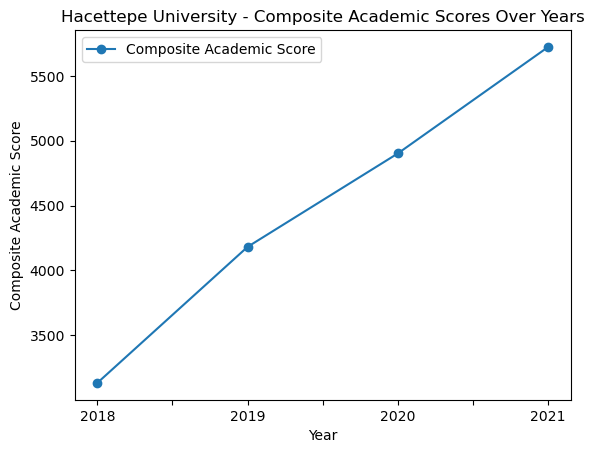


Composite Academic Scores for Istanbul:
   Year  Composite Academic Score
0  2018                  2566.625
1  2019                  3900.455
2  2020                  4298.470
3  2021                  4944.735

Istanbul University - EDA Summary:
       Composite Academic Score
count                  4.000000
mean                3927.571250
std                 1004.174282
min                 2566.625000
25%                 3566.997500
50%                 4099.462500
75%                 4460.036250
max                 4944.735000


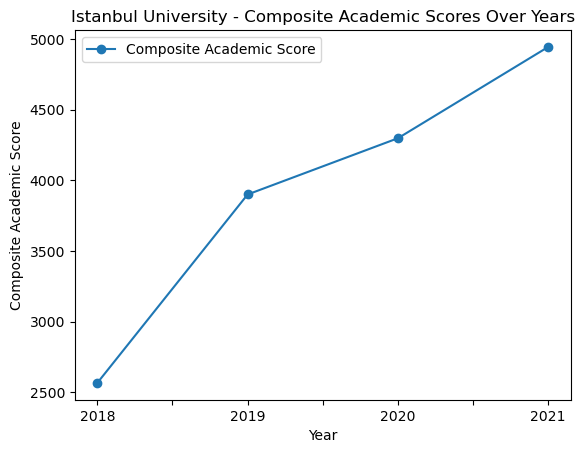


Composite Academic Scores for Itü:
   Year  Composite Academic Score
0  2018                  2643.806
1  2019                  2594.426
2  2020                  2834.769
3  2021                  3391.675

Itü University - EDA Summary:
       Composite Academic Score
count                  4.000000
mean                2866.169000
std                  365.345534
min                 2594.426000
25%                 2631.461000
50%                 2739.287500
75%                 2973.995500
max                 3391.675000


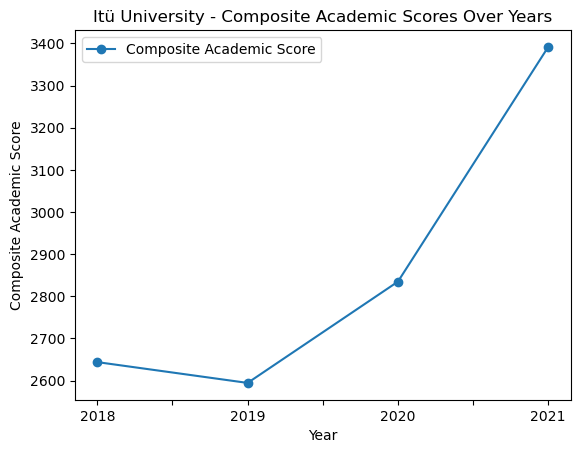


Composite Academic Scores for Odtü:
   Year  Composite Academic Score
0  2018                  2580.655
1  2019                  2924.554
2  2020                  2704.474
3  2021                  3539.489

Odtü University - EDA Summary:
       Composite Academic Score
count                  4.000000
mean                2937.293000
std                  425.909871
min                 2580.655000
25%                 2673.519250
50%                 2814.514000
75%                 3078.287750
max                 3539.489000


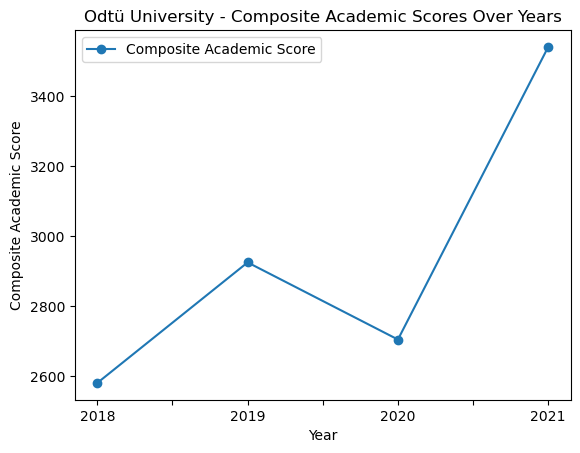


Composite Academic Scores for Yıldız:
   Year  Composite Academic Score
0  2018                  1502.210
1  2019                  2089.019
2  2020                  2523.604
3  2021                  3153.918

Yıldız University - EDA Summary:
       Composite Academic Score
count                  4.000000
mean                2317.187750
std                  697.370034
min                 1502.210000
25%                 1942.316750
50%                 2306.311500
75%                 2681.182500
max                 3153.918000


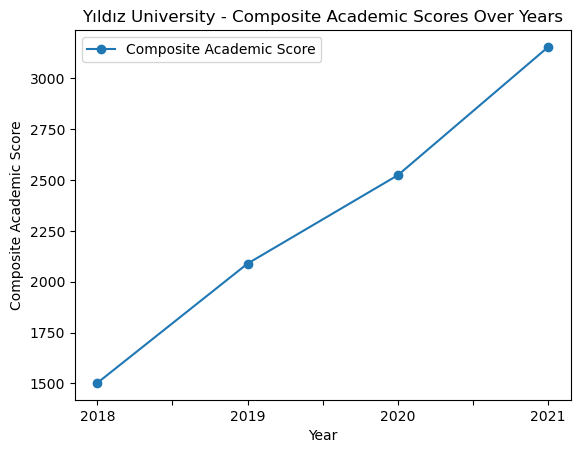

In [2]:
# Define a function to calculate academic scores for each year
def calculate_academic_scores(publications, total_faculty):
    return {year: float(publications[year]) * total_faculty for year in ['2018', '2019', '2020', '2021']}

# Define a function to calculate composite scores based on academic scores
def calculate_composite_score(scores_dict):
    composite_scores = {}
    for year in ['2018', '2019', '2020', '2021']:
        # Sum academic scores for each category for a given year
        composite_scores[year] = sum(scores[year] for scores in scores_dict.values())
    return composite_scores

# Define a function to process university data and calculate composite scores
def process_university_data(data, total_faculty):
    # Adjust these rows based on the structure of your CSV files
    scores_dict = {
        'international': calculate_academic_scores(data.loc[0, ['2018', '2019', '2020', '2021']].astype(float), total_faculty),
        'sci': calculate_academic_scores(data.loc[1, ['2018', '2019', '2020', '2021']].astype(float), total_faculty),
        'top_cited': data.loc[2, ['2018', '2019', '2020', '2021']].astype(float),
        'patent_apps': data.loc[4, ['2018', '2019', '2020', '2021']].astype(float),
        'patents_granted': data.loc[5, ['2018', '2019', '2020', '2021']].astype(float),
        'scholarships': data.loc[9, ['2018', '2019', '2020', '2021']].astype(float)
    }
    return calculate_composite_score(scores_dict)

# Define a function to perform exploratory data analysis (EDA)
def perform_eda(composite_scores_df, university_name):
    print(f"\n{university_name.title()} University - EDA Summary:")
    print(composite_scores_df.describe())

    # Line plot for composite scores over the years
    composite_scores_df.plot(x='Year', y='Composite Academic Score', kind='line', marker='o')
    plt.title(f"{university_name.title()} University - Composite Academic Scores Over Years")
    plt.ylabel('Composite Academic Score')
    plt.show()

# Define a dictionary of universities with their file paths and total faculty counts
universities = {
    'hacettepe': ('/Users/OguzKaganPurcek/Desktop/datasets/hacettepe.csv', 3846),
    'istanbul': ('/Users/OguzKaganPurcek/Desktop/datasets/istanbul.csv', 3515),
    'itü': ('/Users/OguzKaganPurcek/Desktop/datasets/itü.csv', 2277),
    'odtü': ('/Users/OguzKaganPurcek/Desktop/datasets/odtü.csv', 2201),
    'yıldız': ('/Users/OguzKaganPurcek/Desktop/datasets/yıldız.csv', 1719)
}

# Iterate through universities and process their data
for university, (filepath, total_faculty) in universities.items():
    university_data = pd.read_csv(filepath)
    composite_scores = process_university_data(university_data, total_faculty)
        
    composite_scores_df = pd.DataFrame({
        'Year': ['2018', '2019', '2020', '2021'],
        'Composite Academic Score': list(composite_scores.values())
    })

    print(f"Composite Academic Scores for {university.title()}:")
    print(composite_scores_df)
        
    # Perform EDA
    perform_eda(composite_scores_df, university)
    print()

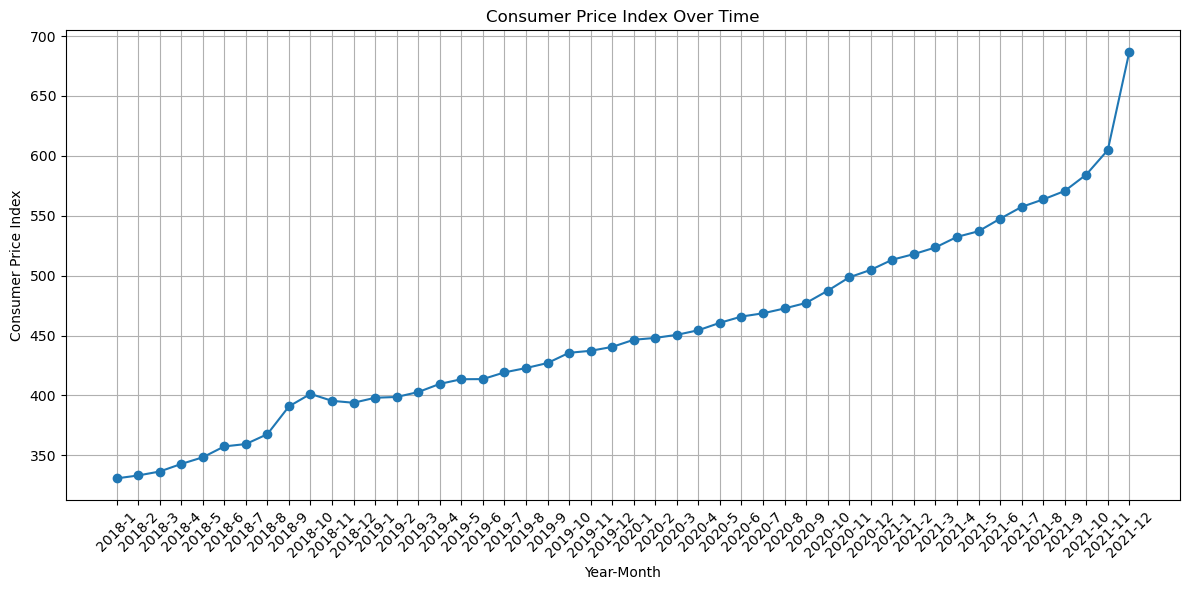

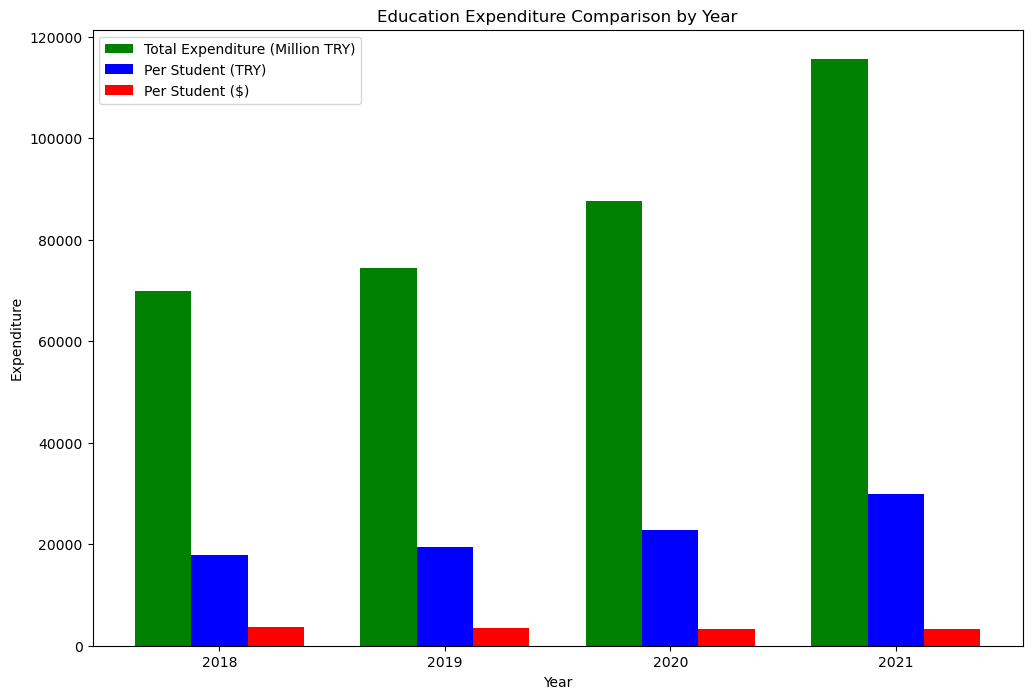

In [3]:
# Initial processing and visualization of the first CSV file
def process_initial_csv(file_path):
    df = pd.read_csv(file_path, sep='|', header=None, skiprows=4)
    cols = ['Year', 'Month', 'baz', 'Costumer Price Index', 'Extra']
    df.columns = cols
    df.drop(axis=1, columns=['Extra', 'baz'], inplace=True)
    df = df.ffill()
    df['Year'] = df['Year'].astype(int)
    df['Month'] = df['Month'].apply(lambda x: int(str(x)[:2]))
    df_pivot = df.pivot_table('Costumer Price Index', ['Year', 'Month'])
    return df_pivot.reset_index()

# Visualizing the pivot table with a line plot
def plot_pivot_table(df_pivot):
    plt.figure(figsize=(12, 6))
    plt.plot(df_pivot['Year'].astype(str) + "-" + df_pivot['Month'].astype(str), 
             df_pivot['Costumer Price Index'], 
             marker='o')
    plt.xticks(rotation=45)
    plt.title('Consumer Price Index Over Time')
    plt.xlabel('Year-Month')
    plt.ylabel('Consumer Price Index')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Processing the education expenditure CSV file
def process_education_csv(file_path):
    education_df = pd.read_csv(file_path, skiprows=2, sep=';')
    education_df.columns = ['Year', 'Education Expenditure (Million TRY)', 
                            'Education Expenditure per Student (TRY)', 'Education Expenditure per Student ($)']
    cols_to_clean = ['Education Expenditure (Million TRY)', 
                     'Education Expenditure per Student (TRY)', 
                     'Education Expenditure per Student ($)']
    education_df[cols_to_clean] = education_df[cols_to_clean].replace(' ', '', regex=True).apply(pd.to_numeric, errors='coerce')
    return education_df

# Creating a grouped bar chart for the updated education data
def plot_grouped_bar_chart(updated_education_df):
    years = updated_education_df['Year']
    expenditure_million_try = updated_education_df['Education Expenditure (Million TRY)']
    expenditure_per_student_try = updated_education_df['Education Expenditure per Student (TRY)']
    expenditure_per_student_usd = updated_education_df['Education Expenditure per Student ($)']
    n_bars = len(years)
    bar_width = 0.25
    index = np.arange(n_bars)
    fig, ax = plt.subplots(figsize=(12, 8))
    bars1 = ax.bar(index, expenditure_million_try, bar_width, label='Total Expenditure (Million TRY)', color='g')
    bars2 = ax.bar(index + bar_width, expenditure_per_student_try, bar_width, label='Per Student (TRY)', color='b')
    bars3 = ax.bar(index + bar_width * 2, expenditure_per_student_usd, bar_width, label='Per Student ($)', color='r')
    ax.set_xlabel('Year')
    ax.set_ylabel('Expenditure')
    ax.set_title('Education Expenditure Comparison by Year')
    ax.set_xticks(index + bar_width)
    ax.set_xticklabels(years)
    ax.legend()
    plt.show()

# First CSV file path
pivot_cpi_csv_path = '/Users/OguzKaganPurcek/Downloads/pivot_cpi.csv'
df_pivot = process_initial_csv(pivot_cpi_csv_path)
plot_pivot_table(df_pivot)

# Second CSV file path
education_csv_path = '/Users/OguzKaganPurcek/Downloads/Education expenditure per student of Tertiary education, 2018-2022.csv'
education_df = process_education_csv(education_csv_path)

# Additional data provided by the user
additional_data = {
    'Year': [2018, 2019],
    'Education Expenditure (Million TRY)': [69914, 74491],
    'Education Expenditure per Student (TRY)': [17902, 19409],
    'Education Expenditure per Student ($)': [3712, 3417]
}

# Adding the additional data to the dataframe
additional_df = pd.DataFrame(additional_data)
updated_education_df = pd.concat([additional_df, education_df], ignore_index=True)
updated_education_df.sort_values(by='Year', inplace=True)

# Plotting the updated education data
plot_grouped_bar_chart(updated_education_df)

In [4]:
updated_education_df

,Year,Education Expenditure (Million TRY),Education Expenditure per Student (TRY),Education Expenditure per Student ($)
0,2018,69914,17902,3712
1,2019,74491,19409,3417
2,2020,87663,22719,3236
3,2021,115573,29953,3365


In [5]:
df_pivot

,Year,Month,Costumer Price Index
0,2018,1,330.75
1,2018,2,333.17
2,2018,3,336.48
3,2018,4,342.78
4,2018,5,348.34
5,2018,6,357.44
6,2018,7,359.41
7,2018,8,367.66
8,2018,9,390.84
9,2018,10,401.27


## Research Questions and Proposed Tests

1. **Tested Research Question**: Is there a significant correlation between inflation-adjusted expenditure and the composite academic score of the universities which calculated via various criteria?
   - *Hypothesis*: Higher inflation-adjusted expenditures lead to a greater number of publications.
   - *Test*: Pearson correlation test and regression analysis will be conducted.
   
2. **Additional Research Questions**:
   - Does expenditure per student correlate with higher world university rankings?
   - Can we use machine learning models to predict future academic success based on current financial and academic metrics?
   - How does inflation correlate with changes in educational spending and academic achievements?

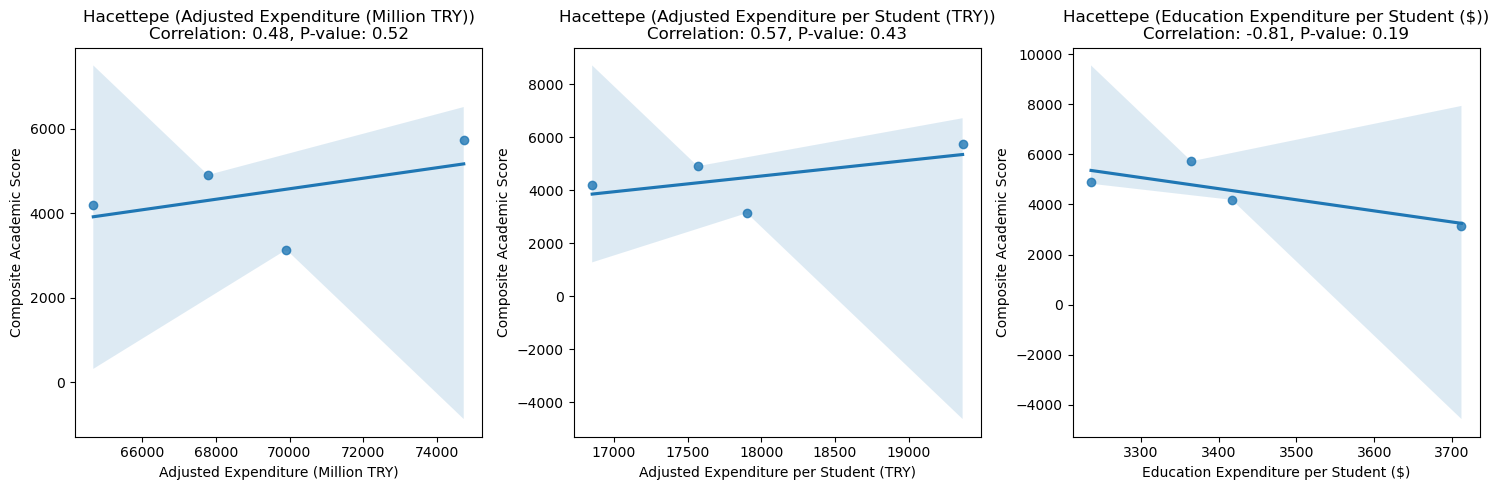

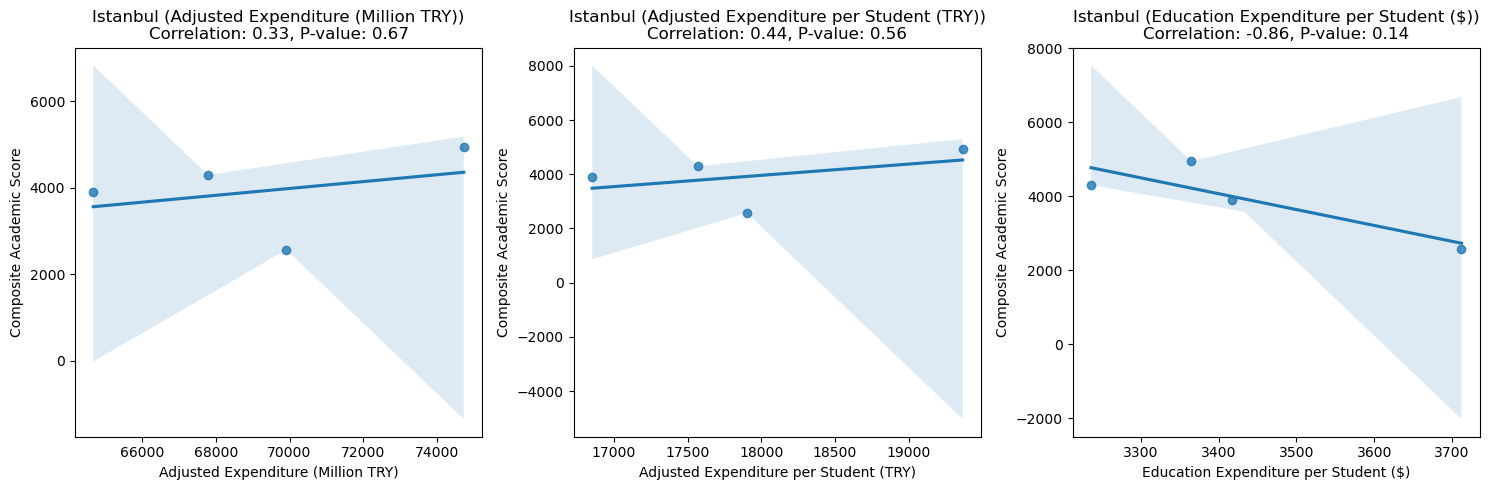

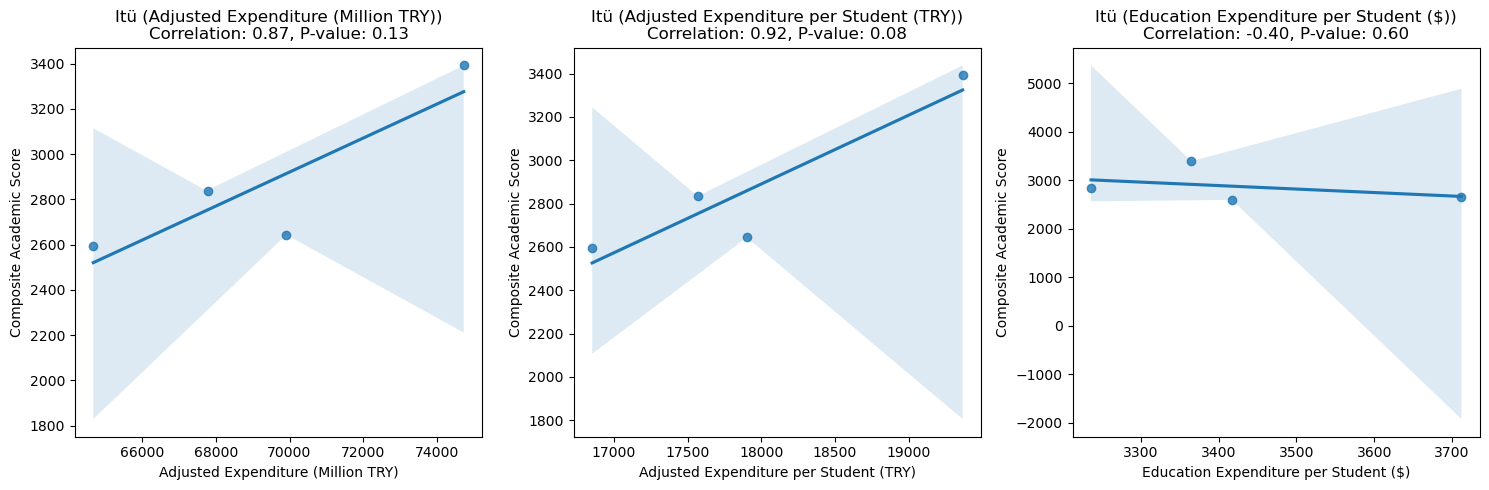

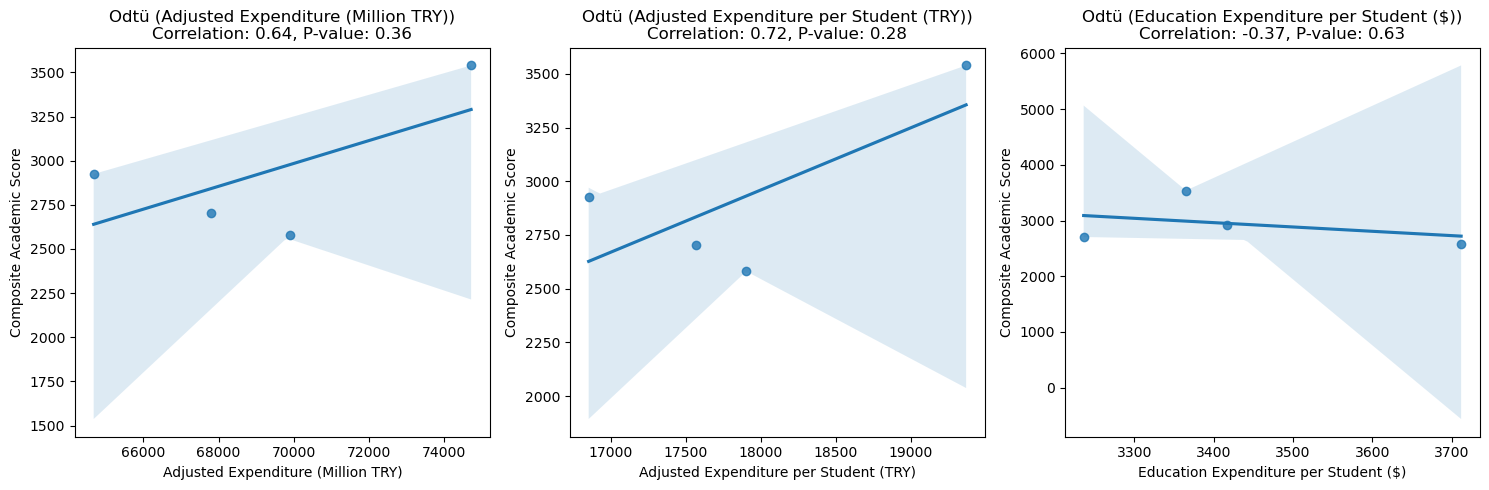

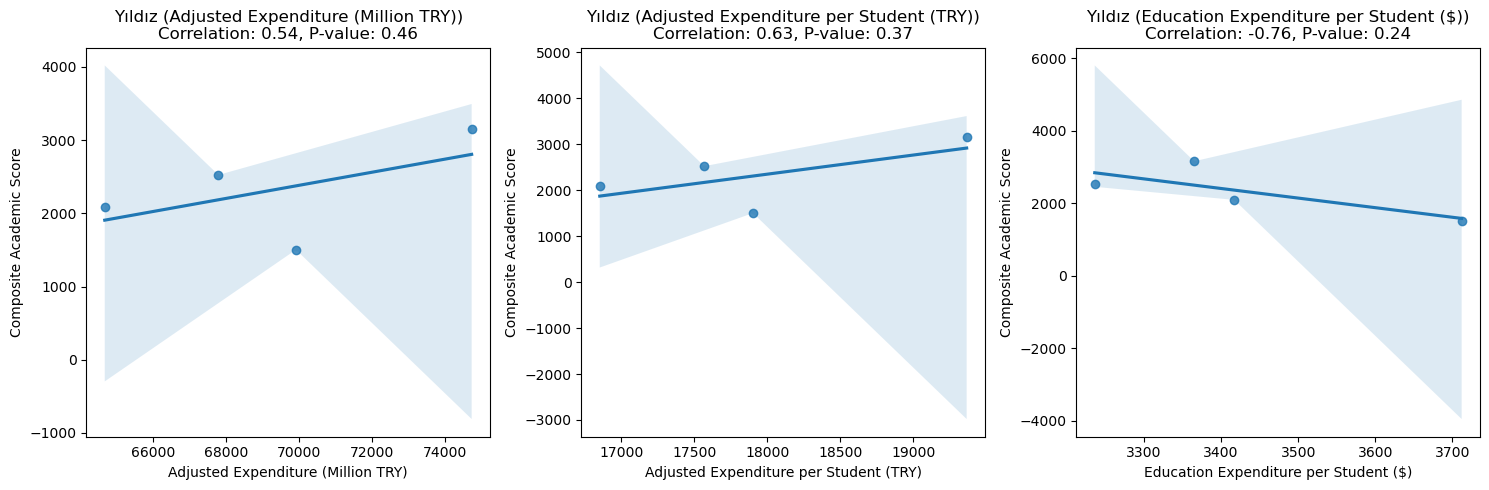

{'Hacettepe': {'Adjusted Expenditure (Million TRY)': {'Correlation Coefficient': 0.4779884628792197,
   'P-Value': 0.5220115371207803},
  'Adjusted Expenditure per Student (TRY)': {'Correlation Coefficient': 0.5708143481053414,
   'P-Value': 0.4291856518946586},
  'Education Expenditure per Student ($)': {'Correlation Coefficient': -0.8115684803896752,
   'P-Value': 0.18843151961032478}},
 'Istanbul': {'Adjusted Expenditure (Million TRY)': {'Correlation Coefficient': 0.33397940498244916,
   'P-Value': 0.6660205950175508},
  'Adjusted Expenditure per Student (TRY)': {'Correlation Coefficient': 0.4374947732040433,
   'P-Value': 0.5625052267959567},
  'Education Expenditure per Student ($)': {'Correlation Coefficient': -0.8600985925369227,
   'P-Value': 0.13990140746307733}},
 'Itü': {'Adjusted Expenditure (Million TRY)': {'Correlation Coefficient': 0.8684218924783029,
   'P-Value': 0.13157810752169707},
  'Adjusted Expenditure per Student (TRY)': {'Correlation Coefficient': 0.91889877372

In [6]:
# CPI and Expenditure data given for inflation adjustment
cpi_annual_averages = {
    '2018': np.mean([330.75, 333.17, 336.48, 342.78, 348.34, 357.44, 359.41, 367.66, 390.84, 401.27, 395.48, 393.88]),
    '2019': np.mean([398.07, 398.71, 402.81, 409.63, 413.52, 413.63, 419.24, 422.84, 427.04, 435.59, 437.25, 440.50]),
    '2020': np.mean([446.45, 448.02, 450.58, 454.43, 460.62, 465.84, 468.56, 472.61, 477.21, 487.38, 498.58, 504.81]),
    '2021': np.mean([513.30, 517.96, 523.53, 532.32, 537.05, 547.48, 557.36, 563.60, 570.66, 584.32, 604.84, 686.95])
}

expenditure_data = {
    'Year': ['2018', '2019', '2020', '2021'],
    'Education Expenditure (Million TRY)': [69914, 74491, 87663, 115573],
    'Education Expenditure per Student (TRY)': [17902, 19409, 22719, 29953],
    'Education Expenditure per Student ($)': [3712, 3417, 3236, 3365]
}

# Composite Academic Scores for universities
academic_scores = {
    'Hacettepe': [3132.448, 4181.882, 4902.548, 5723.386],
    'Istanbul': [2566.625, 3900.455, 4298.470, 4944.735],
    'Itü': [2643.806, 2594.426, 2834.769, 3391.675],
    'Odtü': [2580.655, 2924.554, 2704.474, 3539.489],
    'Yıldız': [1502.210, 2089.019, 2523.604, 3153.918]
}

# Convert to DataFrame
cpi_df = pd.DataFrame.from_dict(cpi_annual_averages, orient='index', columns=['CPI'])
expenditure_df = pd.DataFrame(expenditure_data)

# Assuming 2018 as the base year, we calculate the inflation index for each year
base_year_cpi = cpi_df.loc['2018', 'CPI']
cpi_df['Inflation_Index'] = base_year_cpi / cpi_df['CPI']
expenditure_df = expenditure_df.join(cpi_df['Inflation_Index'], on='Year')

# Adjusting expenditure data for inflation
expenditure_df['Adjusted Expenditure (Million TRY)'] = expenditure_df['Education Expenditure (Million TRY)'] * expenditure_df['Inflation_Index']
expenditure_df['Adjusted Expenditure per Student (TRY)'] = expenditure_df['Education Expenditure per Student (TRY)'] * expenditure_df['Inflation_Index']
# We won't adjust the USD values for inflation since they should already account for currency value changes

# Define a function to calculate the correlation and create plots
def calculate_correlation_and_plot(academic_scores, expenditure_type, university_name):
    # Merge the academic scores with the expenditure data
    merged_df = pd.merge(
        expenditure_df[['Year', expenditure_type]],
        pd.DataFrame({
            'Year': expenditure_df['Year'],
            'Composite Academic Score': academic_scores[university_name]
        }),
        on='Year'
    )

    # Calculate the Pearson correlation coefficient
    correlation, p_value = pearsonr(merged_df[expenditure_type], merged_df['Composite Academic Score'])

    # Plotting
    sns.regplot(x=expenditure_type, y='Composite Academic Score', data=merged_df, label=f'{university_name} ({expenditure_type})')
    plt.title(f'{university_name}\nCorrelation: {correlation:.2f}, P-value: {p_value:.2f}')
    plt.xlabel(expenditure_type)
    plt.ylabel('Composite Academic Score')
    plt.legend()
    plt.tight_layout()

    return correlation, p_value

# Define a function to calculate the correlation and create plots for each university
def calculate_correlation_and_plot(university_name):
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    correlation_results = {}

    for i, expenditure_type in enumerate(['Adjusted Expenditure (Million TRY)', 
                                          'Adjusted Expenditure per Student (TRY)', 
                                          'Education Expenditure per Student ($)']):
        # Merge the academic scores with the expenditure data
        merged_df = pd.merge(
            expenditure_df[['Year', expenditure_type]],
            pd.DataFrame({
                'Year': expenditure_df['Year'],
                'Composite Academic Score': academic_scores[university_name]
            }),
            on='Year'
        )

        # Calculate the Pearson correlation coefficient
        correlation, p_value = pearsonr(merged_df[expenditure_type], merged_df['Composite Academic Score'])

        # Plotting
        sns.regplot(ax=axes[i], x=expenditure_type, y='Composite Academic Score', data=merged_df)
        axes[i].set_title(f'{university_name} ({expenditure_type})\nCorrelation: {correlation:.2f}, P-value: {p_value:.2f}')
        axes[i].set_xlabel(expenditure_type)
        axes[i].set_ylabel('Composite Academic Score')

        # Store the results
        correlation_results[expenditure_type] = {'Correlation Coefficient': correlation, 'P-Value': p_value}

    plt.tight_layout()
    plt.show()
    return correlation_results

# Apply the function for each university
university_correlation_results = {}
for university in academic_scores.keys():
    university_correlation_results[university] = calculate_correlation_and_plot(university)

university_correlation_results

The correlation analysis between different types of educational expenditures and composite academic scores for each university has been conducted. The results, along with the corresponding regression plots for each university, are as follows:

1. **Hacettepe University**:
    - **Adjusted Expenditure (Million TRY):** Correlation Coefficient: 0.478, P-Value: 0.522
    - **Adjusted Expenditure per Student (TRY):** Correlation Coefficient: 0.571, P-Value: 0.429
    - **Education Expenditure per Student ($):** Correlation Coefficient: -0.812, P-Value: 0.188
    
2. **Istanbul University**:
    - **Adjusted Expenditure (Million TRY):** Correlation Coefficient: 0.334, P-Value: 0.666
    - **Adjusted Expenditure per Student (TRY):** Correlation Coefficient: 0.437, P-Value: 0.563
    - **Education Expenditure per Student ($):** Correlation Coefficient: -0.860, P-Value: 0.140
    
3. **Istanbul Technical University**:
    - **Adjusted Expenditure (Million TRY):** Correlation Coefficient: 0.868, P-Value: 0.132
    - **Adjusted Expenditure per Student (TRY):** Correlation Coefficient: 0.919, P-Value: 0.081
    - **Education Expenditure per Student ($):** Correlation Coefficient: -0.395, P-Value: 0.605
    
4. **Middle East Technical University**:
    - **Adjusted Expenditure (Million TRY):** Correlation Coefficient: 0.641, P-Value: 0.359
    - **Adjusted Expenditure per Student (TRY):** Correlation Coefficient: 0.720, P-Value: 0.280
    - **Education Expenditure per Student ($):** Correlation Coefficient: -0.367, P-Value: 0.633
   
5. **Yıldız Technical University**:
    - **Adjusted Expenditure (Million TRY):** Correlation Coefficient: 0.541, P-Value: 0.459
    - **Adjusted Expenditure per Student (TRY):** Correlation Coefficient: 0.631, P-Value: 0.369
    - **Education Expenditure per Student ($):** Correlation Coefficient: -0.763, P-Value: 0.237
   

### General Observation
The hypothesis posited that higher inflation-adjusted expenditures would correlate with a greater number of academic publications. The findings, however, show mixed results across different universities and types of expenditures.

### Specific Observations per University

#### Hacettepe University:
- The correlation coefficients range from 0.478 for overall expenditure to -0.812 for expenditure per student in USD.
- None of the correlations are statistically significant, with the highest p-value being 0.522.
- This suggests that, for Hacettepe, there isn't a clear or statistically significant relationship between the types of expenditures and academic output.

#### Istanbul University:
- Similar to Hacettepe, Istanbul University shows a range of correlations from mildly positive to strongly negative.
- The negative correlation for expenditure per student in USD is particularly notable (-0.860), but not statistically significant.
- These results imply that there's no consistent pattern of expenditure impacting academic output for Istanbul University.

#### Istanbul Technical University:
- ITU shows the strongest positive correlation among the universities, especially for adjusted expenditure per student in TRY (0.919).
- However, this correlation, while strong, does not reach statistical significance.
- The negative correlation for expenditure per student in USD (-0.395) further complicates the interpretation.

#### Middle East Technical University:
- ODTU's results are moderately positive for Turkish Lira expenditures but negative for USD expenditure per student.
- None of these correlations are statistically significant.
- This suggests a lack of a clear relationship between expenditure and academic output for ODTU.

#### Yıldız Technical University:
- Yıldız Technical University shows a moderate positive correlation for Turkish Lira expenditures but a strong negative correlation for USD expenditure per student (-0.763).
- As with the other universities, these correlations are not statistically significant.

#### Overall Interpretation
- **Variability in Correlations:** The analysis shows a mix of positive and negative correlations across different universities and types of expenditures. This variability suggests that the relationship between educational expenditures and academic outputs might be influenced by other factors not accounted for in this analysis.

- **Statistical Significance:** None of the correlations are statistically significant, indicating that the observed relationships could be due to chance. This means we cannot conclusively state that there is a direct relationship between inflation-adjusted expenditures and academic output based on this dataset.

- **Potential External Influences:** The results hint at the complexity of factors influencing academic output. These could include the quality of faculty, student demographics, research facilities, the field of study, and external funding sources.

- **Negative Correlations for USD Expenditures:** The consistently negative correlations for expenditure per student in USD are intriguing. They could suggest that a simple translation of expenditures into USD might not accurately reflect the true purchasing power or investment in educational resources, especially in countries with volatile exchange rates.


#### Conclusion
In conclusion, while the hypothesis suggested a direct positive relationship between inflation-adjusted expenditures and academic output, the data does not support this across the board for the universities analyzed. The relationship between financial investment in education and academic output appears to be more complex than a direct causation and may be influenced by a multitude of other factors. Further investigation, perhaps including qualitative aspects and a broader range of indicators, would be necessary to understand this relationship comprehensively.

## Potential Products or Services

- **Educational Investment Analysis Tool:** A platform providing insights for policy-makers and educational institutions to optimize financial allocations.

- **Benchmarking Service:** Comparing HEIs based on financial investment and academic output for strategic planning.

## Data Engineering Issues
For continuous functioning as a product/service, it's necessary to address:

- Regular data updates and integration from multiple sources.
- Scalable storage and processing capabilities.
- Automated data cleaning and standardization processes.

## Ethical Issues
The project must consider:
- **Data Privacy and Permissions**: Ensuring the confidentiality of data and obtaining necessary permissions for its use.
- **Impact on Stakeholders**: Considering how the findings and recommendations might affect various stakeholders, including students, faculty, and institutions.

## Conclusion
- Successfully merged and analyzed data from multiple sources to explore the impact of financial investments on academic success in HEIs.

- Developed a foundational understanding of the relationship between educational expenditures, academic outputs, and economic factors like inflation.

- Identified potential for transforming the project into practical tools and services for educational policy and institutional strategy.